# Import required libraries

In [1]:
import tensorflow as tf
import tensorflow.keras as keras

from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.models import Sequential

from tensorflow.keras.utils import plot_model as plmd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

2024-10-17 18:12:47.274720: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-17 18:12:48.210019: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-17 18:12:48.465718: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-17 18:12:50.250386: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-17 18:13:02.072537: W tensorflow/compiler/tf2

Download the Datatset:
https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
Extract the files into a folder, and adjust the Keras image inputs given below.

# Data loading and Processing

First we will set training data using keras image data loading

In [2]:
# code adapted from keras website, search keras image data loading

trainset = tf.keras.utils.image_dataset_from_directory(
    'New Plant Diseases Dataset(Augmented)/train',
    labels="inferred", # auto generalised labels from dir 
    label_mode="categorical", # our labels are multiclass text 
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None, # we have different data for validation so no split needed
    subset=None,
    interpolation="bilinear",
    follow_links=False, # we dont have any symlinks
    crop_to_aspect_ratio=False, 
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


I0000 00:00:1728485469.107336  121519 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1728485472.265828  121519 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1728485472.265967  121519 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1728485472.269223  121519 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1728485472.269327  121519 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

Same for validation data

In [3]:
validset = tf.keras.utils.image_dataset_from_directory(
    'New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred", # auto generalised labels from dir 
    label_mode="categorical", # our labels are multiclass text 
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None, # we have different data for validation so no split needed
    subset=None,
    interpolation="bilinear",
    follow_links=False, # we dont have any symlinks
    crop_to_aspect_ratio=False, 
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [4]:
trainset
# 128,128 image dim, 3 RGB dim, 38 class dim

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

# Building model

Start creating a Sequential model

In [15]:
Plantmodel = Sequential()

Input layer

In [16]:
# filter 32
Plantmodel.add(Conv2D(
    filters = 32,
    kernel_size = 3, # the striding matrix
    padding = 'same',
    input_shape=[128,128,3], # 128*128 pixel and 3 rgb
    # strides=(2, 2), # will move 2 pixels
    data_format=None,
    # dilation_rate=(1, 1), # pixel skip basically
    # groups=1,
    activation='relu', 
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
))

# filter 32
Plantmodel.add(Conv2D(
    filters = 32,
    kernel_size = 3, # the striding matrix
    padding = 'same',
    # strides=(2, 2), # will move 2 pixels
    data_format=None,
    # dilation_rate=(1, 1), # pixel skip basically
    # groups=1,
    activation='relu', 
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
))

Plantmodel.add(MaxPool2D(
    pool_size = 2,
    strides = 2,
))

In [17]:
# filter 64
Plantmodel.add(Conv2D(
    filters = 64,
    kernel_size = 3, # the striding matrix
    padding = 'same',
    # input_shape=[128,128,3], # 128*128 pixel and 3 rgb
    # strides=(2, 2), # will move 2 pixels
    data_format=None,
    # dilation_rate=(1, 1), # pixel skip basically
    # groups=1,
    activation='relu', 
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
))

#filter 64
Plantmodel.add(Conv2D(
    filters = 64,
    kernel_size = 3, # the striding matrix
    padding = 'same',
    # strides=(2, 2), # will move 2 pixels
    data_format=None,
    # dilation_rate=(1, 1), # pixel skip basically
    # groups=1,
    activation='relu', 
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
))

Plantmodel.add(MaxPool2D(
    pool_size = 2,
    strides = 2,
))

In [18]:
#filter 128
Plantmodel.add(Conv2D(
    filters = 128,
    kernel_size = 3, # the striding matrix
    padding = 'same',
    # input_shape=[128,128,3], # 128*128 pixel and 3 rgb
    # strides=(2, 2), # will move 2 pixels
    data_format=None,
    # dilation_rate=(1, 1), # pixel skip basically
    # groups=1,
    activation='relu', 
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
))

#filter 128
Plantmodel.add(Conv2D(
    filters = 128,
    kernel_size = 3, # the striding matrix
    padding = 'same',
    # strides=(2, 2), # will move 2 pixels
    data_format=None,
    # dilation_rate=(1, 1), # pixel skip basically
    # groups=1,
    activation='relu', 
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
))

Plantmodel.add(MaxPool2D(
    pool_size = 2,
    strides = 2,
))

In [19]:
# filter 256
Plantmodel.add(Conv2D(
    filters = 256,
    kernel_size = 3, # the striding matrix
    padding = 'same',
    # input_shape=[128,128,3], # 128*128 pixel and 3 rgb
    # strides=(2, 2), # will move 2 pixels
    data_format=None,
    # dilation_rate=(1, 1), # pixel skip basically
    # groups=1,
    activation='relu', 
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
))

#filter 256
Plantmodel.add(Conv2D(
    filters = 256,
    kernel_size = 3, # the striding matrix
    padding = 'same',
    # strides=(2, 2), # will move 2 pixels
    data_format=None,
    # dilation_rate=(1, 1), # pixel skip basically
    # groups=1,
    activation='relu', 
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
))

Plantmodel.add(MaxPool2D(
    pool_size = 2,
    strides = 2,
))

In [20]:
Plantmodel.add(Flatten())

Plantmodel.add(Dense(
    units=1024,
    activation = 'relu'
))

Plantmodel.add(Dense(
    units=768,
    activation = 'relu'
))

Plantmodel.add(Dense(
    units=512,
    activation = 'relu'
))

Output layer

In [21]:
Plantmodel.add(Dense(
    units=38,
    activation = 'softmax'
))

Compile model

In [22]:
Plantmodel.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Show the model Summary

In [23]:
Plantmodel.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1024)           │    16,778,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 768)            │       787,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       393,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 38)             │        19,494 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,150,918 (73.05 MB)

 Trainable params: 19,150,918 (73.05 MB)

 Non-trainable params: 0 (0.00 B)

Plot the model

In [28]:
plmd(model=Plantmodel, show_shapes=True, show_layer_activations=True)

Train our model

In [29]:
model1hist = Plantmodel.fit(x=trainset,validation_data=validset, epochs=10)

Epoch 1/10


I0000 00:00:1728479062.535344   72388 service.cc:146] XLA service 0x7fc234001f90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728479062.539474   72388 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-10-09 18:34:23.195946: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-09 18:34:25.605487: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-10-09 18:34:29.370235: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_863', 132 bytes spill stores, 132 bytes spill loads

2024-10-09 18:34:30.896186: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memo

2196/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.2425 - loss: 2.7620

2024-10-09 18:37:28.067681: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_863', 32 bytes spill stores, 32 bytes spill loads

2024-10-09 18:37:28.140568: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_863', 12 bytes spill stores, 12 bytes spill loads

2024-10-09 18:37:28.671023: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_863', 200 bytes spill stores, 200 bytes spill loads

2024-10-09 18:37:31.370931: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_877', 208 bytes spill stores, 208 bytes spill loads

2024-10-09 18:37:32.770938: I external/local_xla/xla/stream_

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.2426 - loss: 2.7616

2024-10-09 18:38:25.827622: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_163', 8 bytes spill stores, 8 bytes spill loads



2197/2197 ━━━━━━━━━━━━━━━━━━━━ 252s 94ms/step - accuracy: 0.2427 - loss: 2.7612 - val_accuracy: 0.7366 - val_loss: 0.8369
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 163s 74ms/step - accuracy: 0.7573 - loss: 0.7544 - val_accuracy: 0.8065 - val_loss: 0.5913
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 162s 74ms/step - accuracy: 0.8484 - loss: 0.4581 - val_accuracy: 0.8490 - val_loss: 0.4678
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 157s 71ms/step - accuracy: 0.8895 - loss: 0.3375 - val_accuracy: 0.8597 - val_loss: 0.4623
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 160s 73ms/step - accuracy: 0.9101 - loss: 0.2759 - val_accuracy: 0.8784 - val_loss: 0.4053
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 159s 72ms/step - accuracy: 0.9263 - loss: 0.2240 - val_accuracy: 0.8753 - val_loss: 0.4336
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 158s 72ms/step - accuracy: 0.9310 - loss: 0.2093 - val_accuracy: 0.8720 - val_loss: 0.4678
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 158s 72ms/step - accuracy: 0.9400 - lo

In [30]:
Plantmodel.save("PlantModelV1.keras")

2024-10-09 19:02:42.873656: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.
2024-10-09 19:02:49.887038: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.
2024-10-09 19:02:53.685276: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.


Visualization plotting

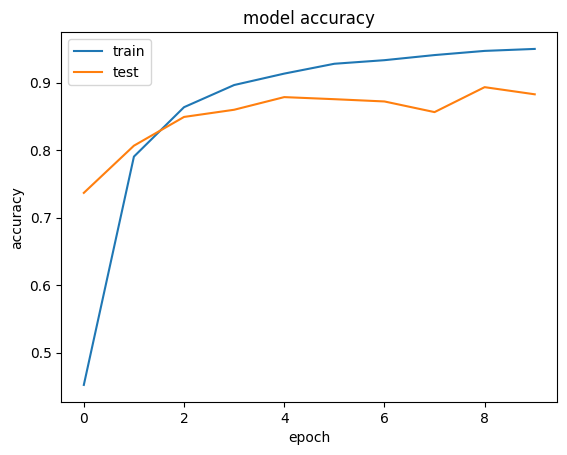

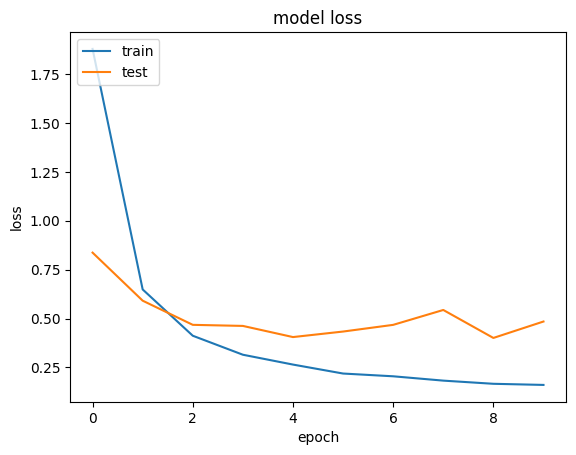

In [37]:
# summarize history for accuracy
plt.plot(model1hist.history['accuracy'])
plt.plot(model1hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model1hist.history['loss'])
plt.plot(model1hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## We have a moderately high loss on validation set
possible solutions:
1. reduce learning rate
2. increase neurons to gather more information
3. add more cnn layers to extract more features

# Building new model

Start creating a Sequential model

In [38]:
Plantmodel2 = Sequential()

Input layer

In [39]:
# filter 32
Plantmodel2.add(Conv2D(
    filters = 32,
    kernel_size = 3, # the striding matrix
    padding = 'same',
    input_shape=[128,128,3], # 128*128 pixel and 3 rgb
    # strides=(2, 2), # will move 2 pixels
    data_format=None,
    # dilation_rate=(1, 1), # pixel skip basically
    # groups=1,
    activation='relu', 
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
))

# filter 32
Plantmodel2.add(Conv2D(
    filters = 32,
    kernel_size = 3, # the striding matrix
    # padding = 'same',
    # strides=(2, 2), # will move 2 pixels
    data_format=None,
    # dilation_rate=(1, 1), # pixel skip basically
    # groups=1,
    activation='relu', 
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
))

Plantmodel2.add(MaxPool2D(
    pool_size = 2,
    strides = 2,
))

/home/sidthechillguy/anaconda3/envs/tensorflow/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
# filter 64
Plantmodel2.add(Conv2D(
    filters = 64,
    kernel_size = 3, # the striding matrix
    padding = 'same',
    # input_shape=[128,128,3], # 128*128 pixel and 3 rgb
    # strides=(2, 2), # will move 2 pixels
    data_format=None,
    # dilation_rate=(1, 1), # pixel skip basically
    # groups=1,
    activation='relu', 
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
))

#filter 64
Plantmodel2.add(Conv2D(
    filters = 64,
    kernel_size = 3, # the striding matrix
    # padding = 'same',
    # strides=(2, 2), # will move 2 pixels
    data_format=None,
    # dilation_rate=(1, 1), # pixel skip basically
    # groups=1,
    activation='relu', 
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
))

Plantmodel2.add(MaxPool2D(
    pool_size = 2,
    strides = 2,
))

In [41]:
#filter 128
Plantmodel2.add(Conv2D(
    filters = 128,
    kernel_size = 3, # the striding matrix
    padding = 'same',
    # input_shape=[128,128,3], # 128*128 pixel and 3 rgb
    # strides=(2, 2), # will move 2 pixels
    data_format=None,
    # dilation_rate=(1, 1), # pixel skip basically
    # groups=1,
    activation='relu', 
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
))

#filter 128
Plantmodel2.add(Conv2D(
    filters = 128,
    kernel_size = 3, # the striding matrix
    # padding = 'same',
    # strides=(2, 2), # will move 2 pixels
    data_format=None,
    # dilation_rate=(1, 1), # pixel skip basically
    # groups=1,
    activation='relu', 
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
))

Plantmodel2.add(MaxPool2D(
    pool_size = 2,
    strides = 2,
))

In [42]:
# filter 256
Plantmodel2.add(Conv2D(
    filters = 256,
    kernel_size = 3, # the striding matrix
    padding = 'same',
    # input_shape=[128,128,3], # 128*128 pixel and 3 rgb
    # strides=(2, 2), # will move 2 pixels
    data_format=None,
    # dilation_rate=(1, 1), # pixel skip basically
    # groups=1,
    activation='relu', 
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
))

#filter 256
Plantmodel2.add(Conv2D(
    filters = 256,
    kernel_size = 3, # the striding matrix
    # padding = 'same',
    # strides=(2, 2), # will move 2 pixels
    data_format=None,
    # dilation_rate=(1, 1), # pixel skip basically
    # groups=1,
    activation='relu', 
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
))

Plantmodel2.add(MaxPool2D(
    pool_size = 2,
    strides = 2,
))

In [43]:
# filter 512
Plantmodel2.add(Conv2D(
    filters = 512,
    kernel_size = 3, # the striding matrix
    padding = 'same',
    # input_shape=[128,128,3], # 128*128 pixel and 3 rgb
    # strides=(2, 2), # will move 2 pixels
    data_format=None,
    # dilation_rate=(1, 1), # pixel skip basically
    # groups=1,
    activation='relu', 
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
))

#filter 512
Plantmodel2.add(Conv2D(
    filters = 512,
    kernel_size = 3, # the striding matrix
    # padding = 'same',
    # strides=(2, 2), # will move 2 pixels
    data_format=None,
    # dilation_rate=(1, 1), # pixel skip basically
    # groups=1,
    activation='relu', 
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
))

Plantmodel2.add(MaxPool2D(
    pool_size = 2,
    strides = 2,
))

Add dropout layer

In [46]:
Plantmodel2.add(Dropout(0.15))

In [47]:
Plantmodel2.add(Flatten())

Plantmodel2.add(Dense(
    units=1500,
    activation = 'relu'
))

Plantmodel2.add(Dropout(0.35))

Plantmodel2.add(Dense(
    units=512,
    activation = 'relu'
))

Output layer

In [48]:
Plantmodel2.add(Dense(
    units=38,
    activation = 'softmax'
))

Compile model

In [49]:
Plantmodel2.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

Show the model Summary

In [50]:
Plantmodel2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │       768,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 38)             │        19,494 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,573,730 (32.71 MB)

 Trainable params: 8,573,730 (32.71 MB)

 Non-trainable params: 0 (0.00 B)

Plot the model

In [52]:
plmd(model=Plantmodel2, show_shapes=True, show_layer_activations=True)

Train our model

In [53]:
model2hist = Plantmodel2.fit(x=trainset,validation_data=validset, epochs=10)

Epoch 1/10


2024-10-09 19:25:25.896960: W external/local_tsl/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.21GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


2196/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.0287 - loss: 3.6559

2024-10-09 19:27:57.859363: W external/local_tsl/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.17GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.0287 - loss: 3.6559

2024-10-09 19:28:09.255864: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_180', 148 bytes spill stores, 148 bytes spill loads

2024-10-09 19:28:09.501363: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_180', 100 bytes spill stores, 100 bytes spill loads



2197/2197 ━━━━━━━━━━━━━━━━━━━━ 209s 84ms/step - accuracy: 0.0287 - loss: 3.6559 - val_accuracy: 0.0274 - val_loss: 3.6364
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 163s 74ms/step - accuracy: 0.0279 - loss: 3.6369 - val_accuracy: 0.0274 - val_loss: 3.6362
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 164s 74ms/step - accuracy: 0.0279 - loss: 3.6367 - val_accuracy: 0.0287 - val_loss: 3.6361
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 163s 74ms/step - accuracy: 0.0285 - loss: 3.6367 - val_accuracy: 0.0287 - val_loss: 3.6361
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 166s 75ms/step - accuracy: 0.0281 - loss: 3.6367 - val_accuracy: 0.0287 - val_loss: 3.6361
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 164s 75ms/step - accuracy: 0.0287 - loss: 3.6367 - val_accuracy: 0.0287 - val_loss: 3.6361
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 170s 77ms/step - accuracy: 0.0284 - loss: 3.6366 - val_accuracy: 0.0287 - val_loss: 3.6361
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 165s 75ms/step - accuracy: 0.0287 - lo

In [54]:
Plantmodel2.save("PlantModelV2.keras")

Visualization plotting

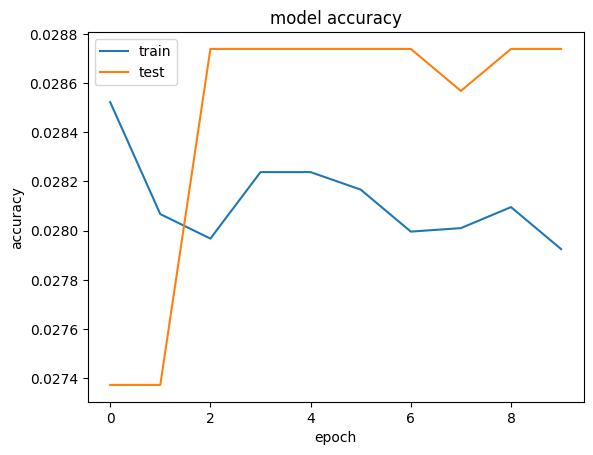

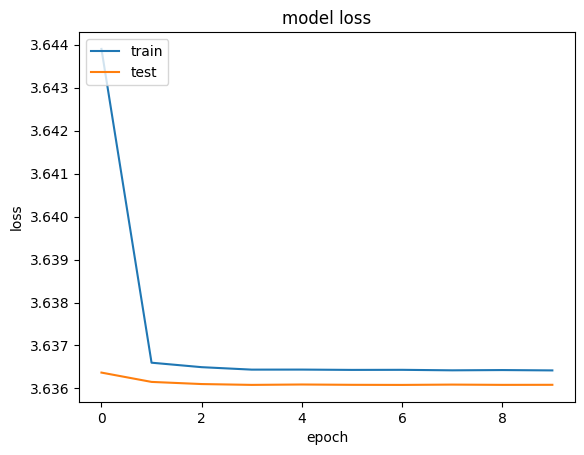

In [55]:
# summarize history for accuracy
plt.plot(model2hist.history['accuracy'])
plt.plot(model2hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model2hist.history['loss'])
plt.plot(model2hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Worse Performance

# Create a new model

In [15]:
Plantmodel3 = Sequential()

In [16]:
Plantmodel3.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
Plantmodel3.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
Plantmodel3.add(MaxPool2D(pool_size=2,strides=2))

Plantmodel3.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
Plantmodel3.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
Plantmodel3.add(MaxPool2D(pool_size=2,strides=2))

Plantmodel3.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
Plantmodel3.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
Plantmodel3.add(MaxPool2D(pool_size=2,strides=2))

Plantmodel3.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
Plantmodel3.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
Plantmodel3.add(MaxPool2D(pool_size=2,strides=2))

Plantmodel3.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
Plantmodel3.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
Plantmodel3.add(MaxPool2D(pool_size=1,strides=2))

Plantmodel3.add(Dropout(0.20))
Plantmodel3.add(Flatten())

Plantmodel3.add(Dense(units=1500,activation='relu'))

Plantmodel3.add(Dropout(0.35))

Plantmodel3.add(Dense(units=512,activation='relu'))

Plantmodel3.add(Dropout(0.10))

Plantmodel3.add(Dense(units=38,activation='softmax'))

In [17]:
Plantmodel3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
Plantmodel3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       768,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 38)             │        19,494 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,573,730 (32.71 MB)

 Trainable params: 8,573,730 (32.71 MB)

 Non-trainable params: 0 (0.00 B)

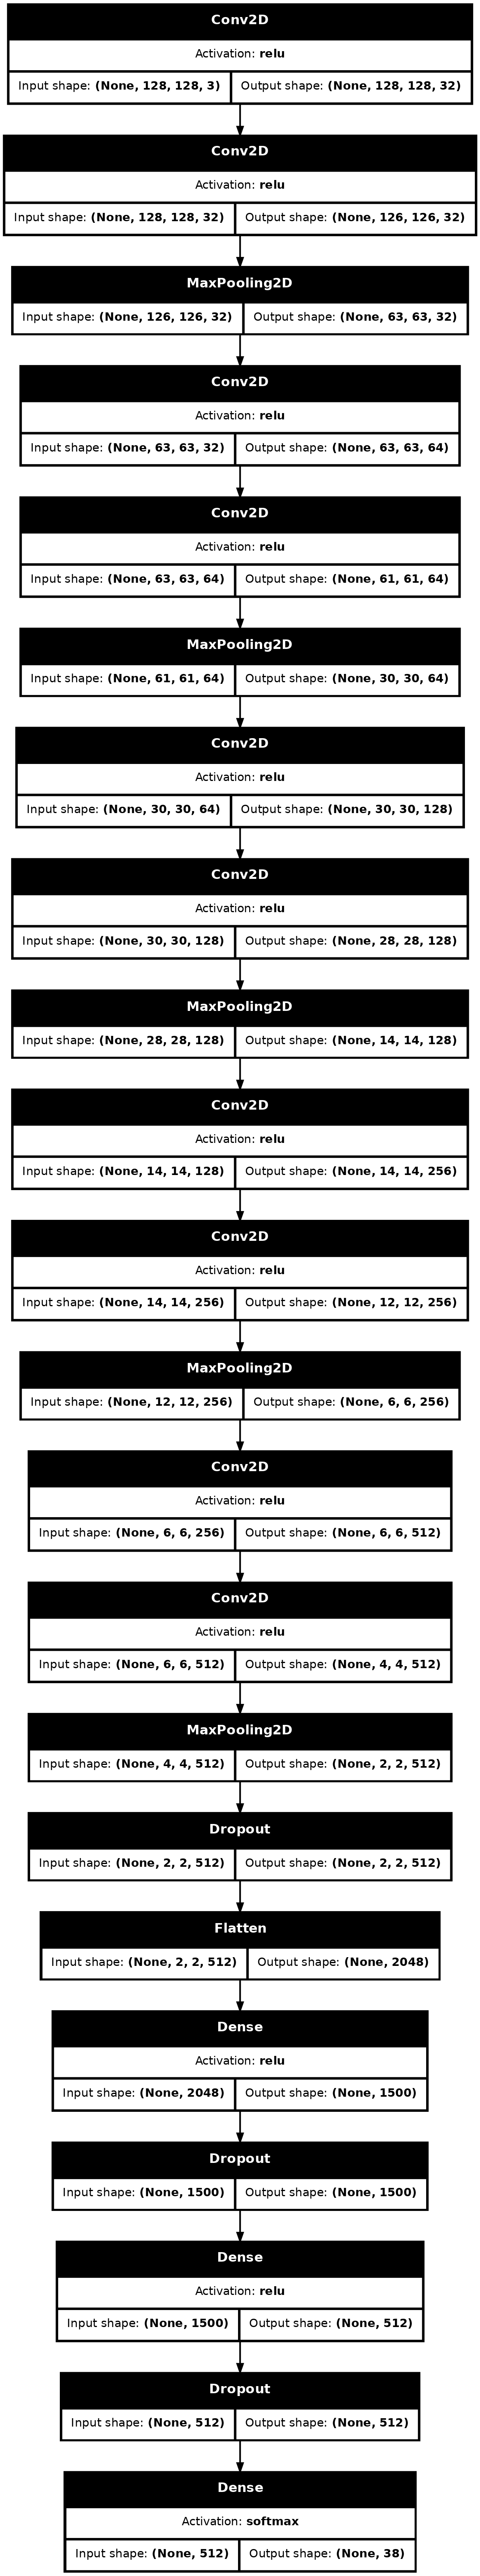

In [50]:
plmd(model=Plantmodel3, show_layer_activations=True, to_file='PlantmodelV3.png',show_shapes=True,dpi=150)

In [20]:
model3hist = Plantmodel3.fit(x=trainset, validation_data=validset, epochs=10, verbose=1)

Epoch 1/10


2024-10-09 20:25:28.814193: W external/local_tsl/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.21GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


   1/2197 ━━━━━━━━━━━━━━━━━━━━ 14:11:22 23s/step - accuracy: 0.0000e+00 - loss: 4.1146

I0000 00:00:1728485740.751552  122591 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2196/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.3575 - loss: 2.2866

2024-10-09 20:28:02.218386: W external/local_tsl/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.17GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.3576 - loss: 2.2862

2024-10-09 20:28:19.082961: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_180', 100 bytes spill stores, 100 bytes spill loads

2024-10-09 20:28:19.308067: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_180', 148 bytes spill stores, 148 bytes spill loads



2197/2197 ━━━━━━━━━━━━━━━━━━━━ 213s 86ms/step - accuracy: 0.3577 - loss: 2.2859 - val_accuracy: 0.7577 - val_loss: 0.7600
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 166s 75ms/step - accuracy: 0.8124 - loss: 0.5958 - val_accuracy: 0.9056 - val_loss: 0.3030
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 167s 76ms/step - accuracy: 0.8981 - loss: 0.3203 - val_accuracy: 0.9079 - val_loss: 0.2827
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 176s 80ms/step - accuracy: 0.9326 - loss: 0.2109 - val_accuracy: 0.9326 - val_loss: 0.2124
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 171s 78ms/step - accuracy: 0.9489 - loss: 0.1527 - val_accuracy: 0.9358 - val_loss: 0.2112
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 168s 76ms/step - accuracy: 0.9592 - loss: 0.1238 - val_accuracy: 0.9328 - val_loss: 0.2393
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 169s 77ms/step - accuracy: 0.9664 - loss: 0.1016 - val_accuracy: 0.9503 - val_loss: 0.1615
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 169s 77ms/step - accuracy: 0.9721 - lo

In [21]:
Plantmodel3.save("PlantModelV3.keras")

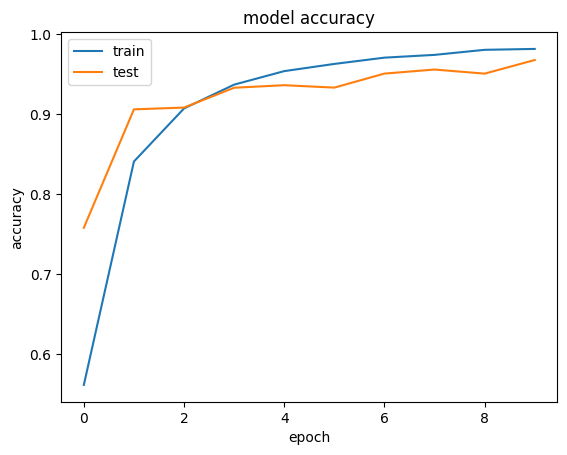

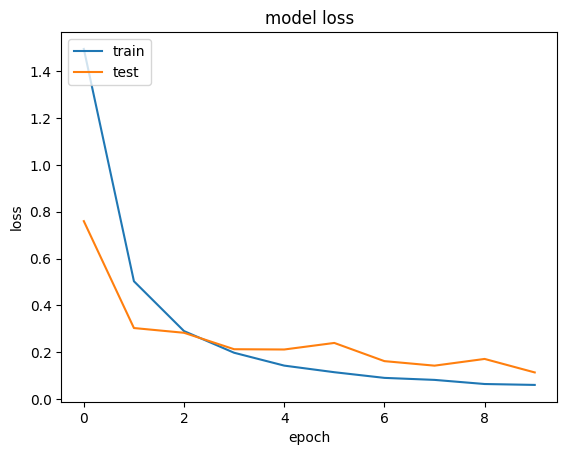

In [22]:
# summarize history for accuracy
plt.plot(model3hist.history['accuracy'])
plt.plot(model3hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model3hist.history['loss'])
plt.plot(model3hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Evaluation Results

In [23]:
Plantmodel3.evaluate(trainset)

2196/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.9926 - loss: 0.0234

2024-10-09 21:38:46.184886: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_180', 152 bytes spill stores, 152 bytes spill loads

2024-10-09 21:38:48.602707: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_180', 244 bytes spill stores, 244 bytes spill loads



2197/2197 ━━━━━━━━━━━━━━━━━━━━ 186s 82ms/step - accuracy: 0.9926 - loss: 0.0234


[0.021126478910446167, 0.9932427406311035]

In [24]:
Plantmodel3.evaluate(validset)

550/550 ━━━━━━━━━━━━━━━━━━━━ 37s 67ms/step - accuracy: 0.9655 - loss: 0.1153


[0.11319512873888016, 0.967277467250824]

# Metric analysis

In [25]:
class_names = validset.class_names

In [27]:
testset = tf.keras.utils.image_dataset_from_directory(
    'New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred", # auto generalised labels from dir 
    label_mode="categorical", # our labels are multiclass text 
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None, # we have different data for validation so no split needed
    subset=None,
    interpolation="bilinear",
    follow_links=False, # we dont have any symlinks
    crop_to_aspect_ratio=False, 
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [28]:
y_pred = Plantmodel3.predict(testset)

550/550 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step


In [29]:
y_pred, y_pred.shape

(array([[9.9999928e-01, 6.7236402e-07, 4.3691220e-09, ..., 1.2267601e-13,
         2.0516885e-12, 3.7452159e-12],
        [9.9999547e-01, 1.7072723e-06, 2.8120011e-08, ..., 2.0899725e-12,
         1.3393906e-11, 6.3302287e-11],
        [1.0000000e+00, 1.5717386e-12, 7.2454039e-12, ..., 2.1344624e-19,
         3.9996797e-17, 1.2179281e-15],
        ...,
        [4.4273911e-08, 1.6401441e-11, 2.0099014e-07, ..., 5.7603639e-10,
         6.2059939e-09, 9.9997199e-01],
        [4.3146269e-08, 3.8049147e-12, 5.5822746e-08, ..., 3.1494526e-10,
         1.1651636e-09, 9.9999213e-01],
        [8.4213747e-12, 1.1483571e-15, 9.2884060e-12, ..., 5.1671287e-14,
         8.1731422e-14, 9.9999988e-01]], dtype=float32),
 (17572, 38))

In [30]:
predicted_cat = tf.argmax(y_pred, axis=1) # axis=1 grants columns

In [31]:
predicted_cat

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [33]:
# now we need row of y real
true_cat = tf.concat([j for i,j in testset], axis=0) # axis 0 grants row
true_cat = tf.argmax(true_cat, axis=1)

In [34]:
true_cat

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

Classification report

In [37]:
print(classification_report(y_true=true_cat, y_pred=predicted_cat, target_names=class_names))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.97      0.96       504
                                 Apple___Black_rot       0.97      0.98      0.97       497
                          Apple___Cedar_apple_rust       0.98      0.98      0.98       440
                                   Apple___healthy       0.98      0.92      0.95       502
                               Blueberry___healthy       0.99      0.96      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.99      0.99       421
                 Cherry_(including_sour)___healthy       0.99      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.86      0.91       410
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.90      0.98      0.

## Confusion matrix

In [53]:
cm = confusion_matrix(y_pred=predicted_cat, y_true=true_cat)

In [55]:
print(cm.shape)

(38, 38)


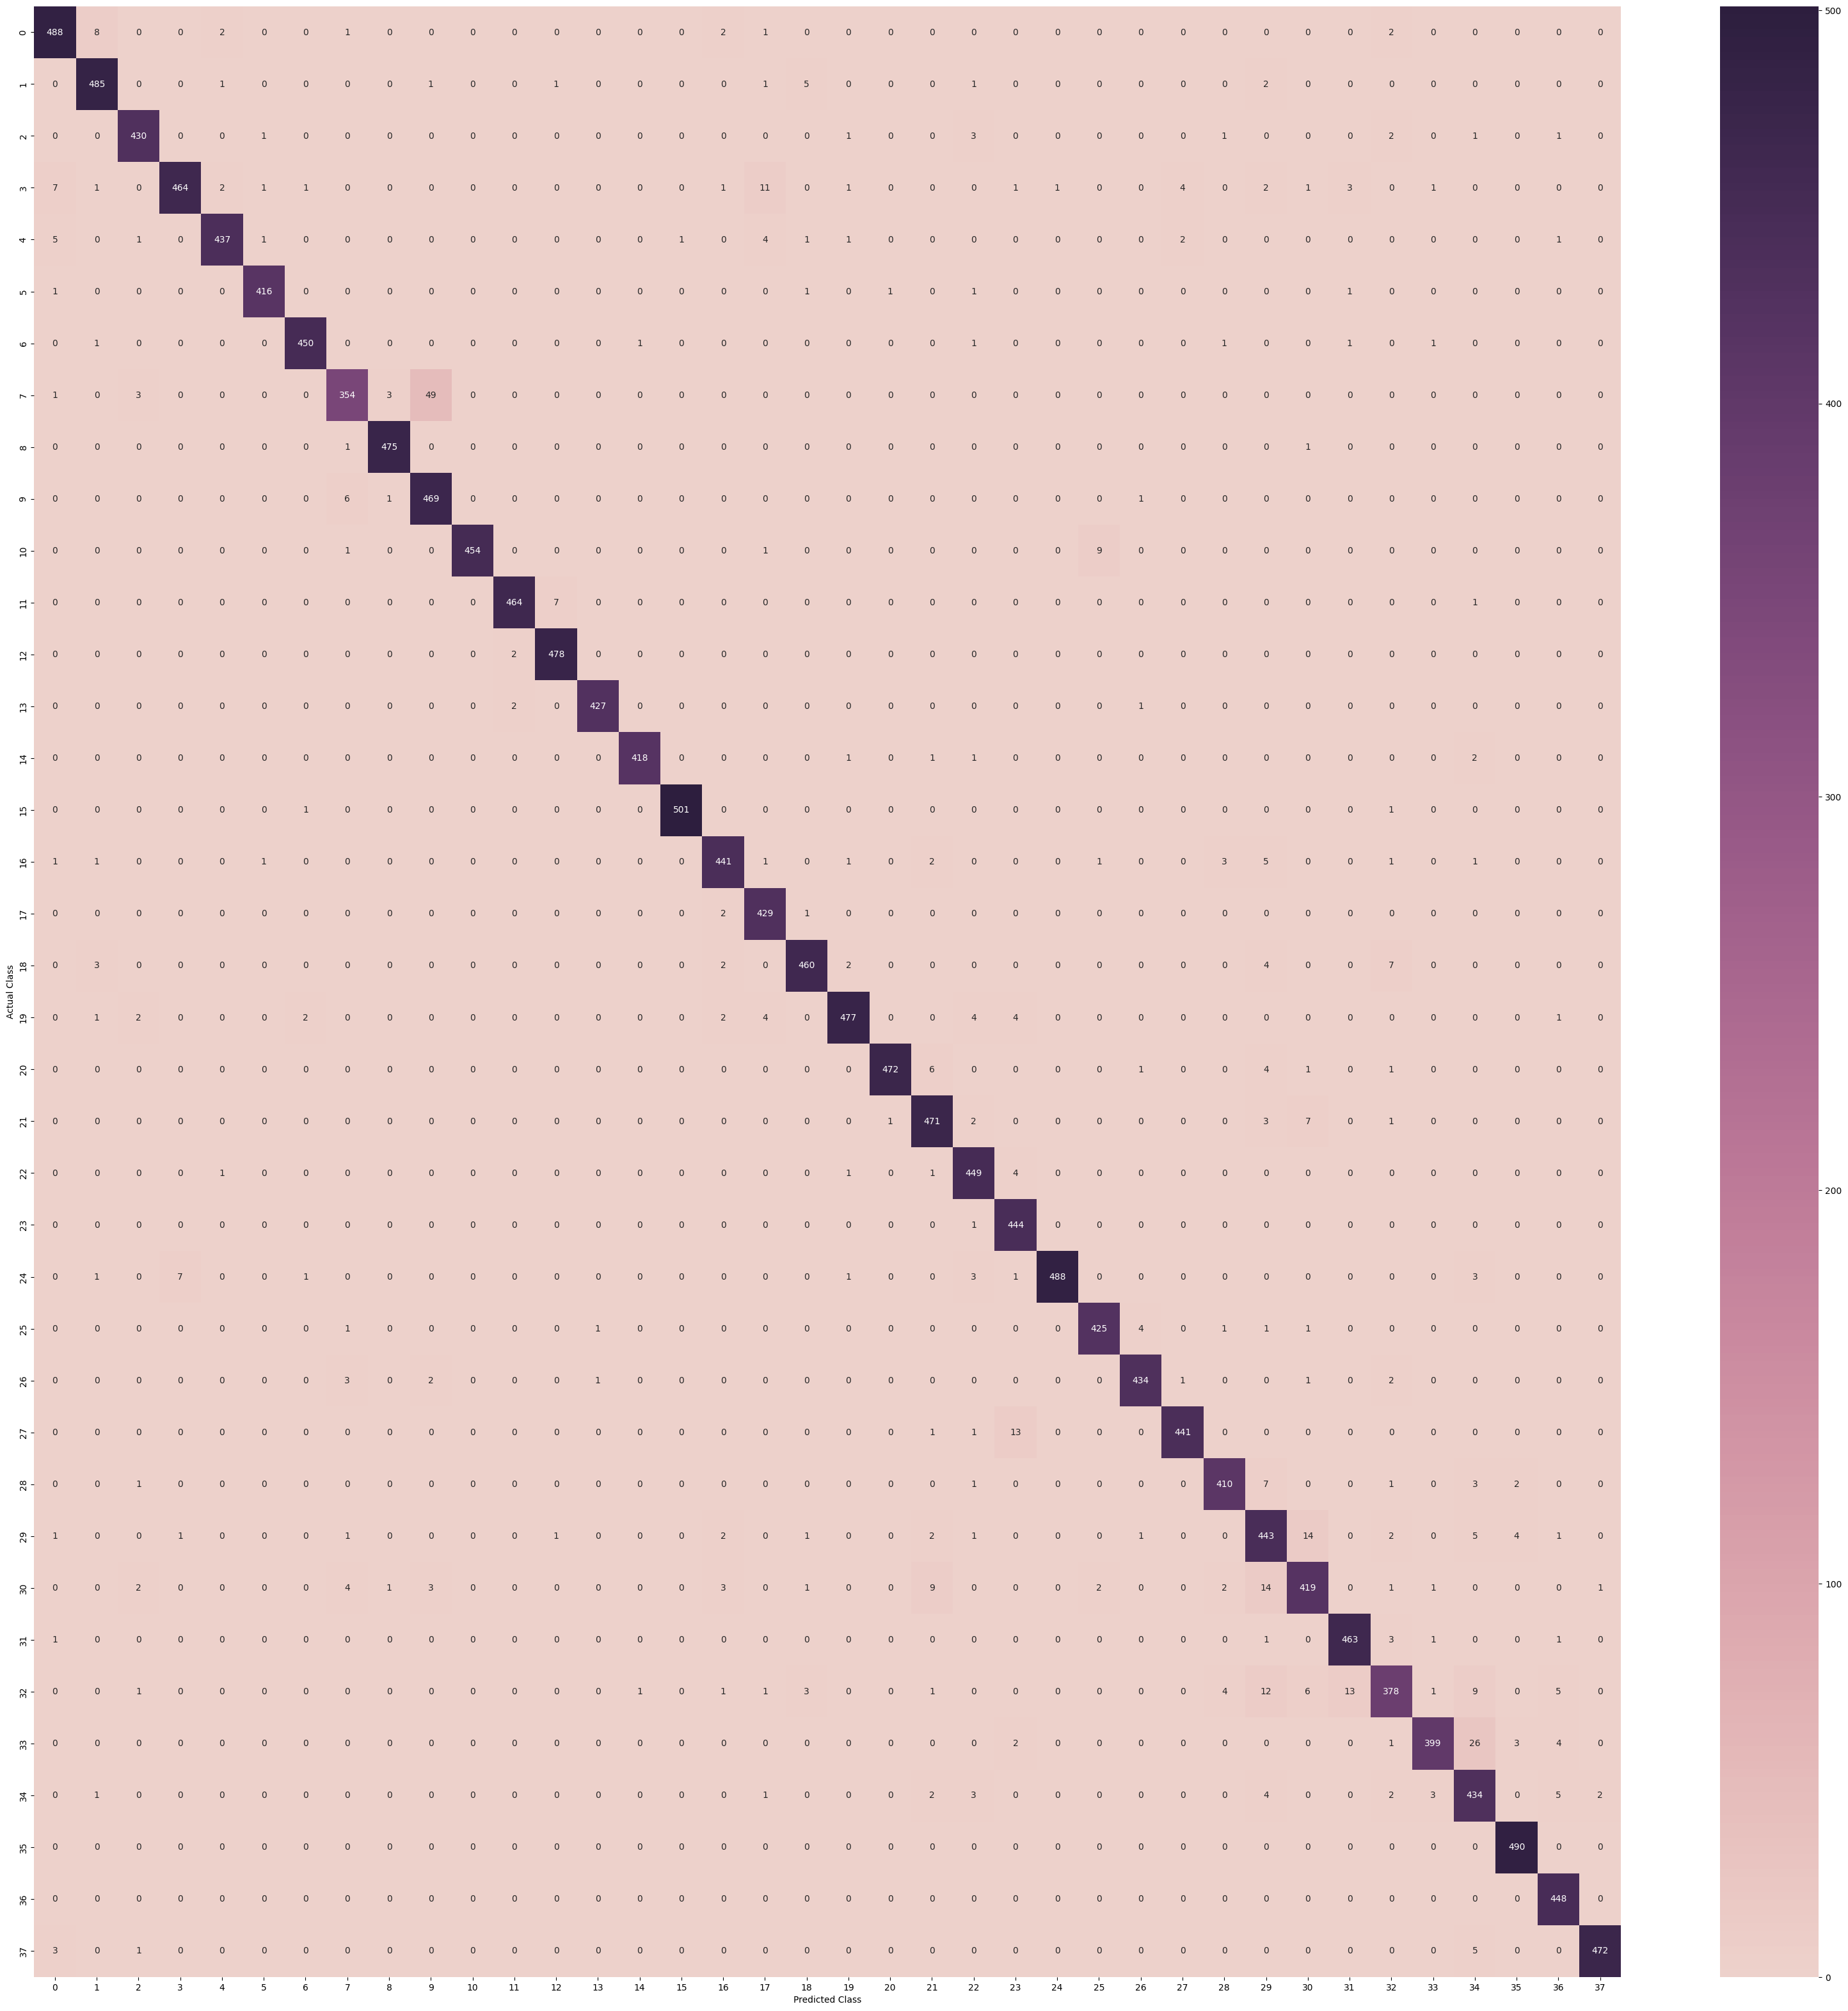

In [70]:
plt.figure(figsize=(40,40))
sns.heatmap(cm, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), fmt='d',)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()